In [ ]:
!pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.0/317.0 MB 2.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.1-py2.py3-none-any.whl size=317488491 sha256=df10cf1e993a356eda75037a876de69cea26ca8843285aba539f6629d3bfd66a
  Stored in directory: /root/.cache/pip/wheels/80/1d/60/2c256ed38dddce2fdd93be545214a63e02fbd8d74fb0b7f3a6
Successfully built pyspark


In [ ]:
from pyspark.sql import SparkSession
import pyspark.sql.functions as F
import time

# Initialize Spark session
spark = SparkSession.builder.appName("WideTransformationOptimization").getOrCreate()

# Generate sample data
num_rows = 10**2
num_cols = 50

data = [[float(i) for i in range(num_cols)] for j in range(num_rows)]
columns = [f'col_{i}' for i in range(num_cols)]
df = spark.createDataFrame(data, columns)


In [ ]:
def traditional_transformation(df):
    start_time = time.time()
    for col in df.columns:
        df = df.withColumn(col, F.pow(F.col(col), 2) + F.log(F.col(col) + 1))
    df.collect()  # Triggering the action to evaluate time
    end_time = time.time()
    print(f"Traditional transformation took {end_time - start_time} seconds")

traditional_transformation(df)


Traditional transformation took 8.587775468826294 seconds


In [ ]:
def optimized_transformation(df):
    start_time = time.time()
    exprs = [((F.pow(F.col(col), 2) + F.log(F.col(col) + 1)).alias(col)) for col in df.columns]
    df = df.select(*exprs)
    df.collect()  # Triggering the action to evaluate time
    end_time = time.time()
    print(f"Optimized transformation took {end_time - start_time} seconds")

optimized_transformation(df)

Optimized transformation took 1.7688276767730713 seconds


Traditional transformation took 2.8132219314575195 seconds
Optimized transformation took 1.8288953304290771 seconds


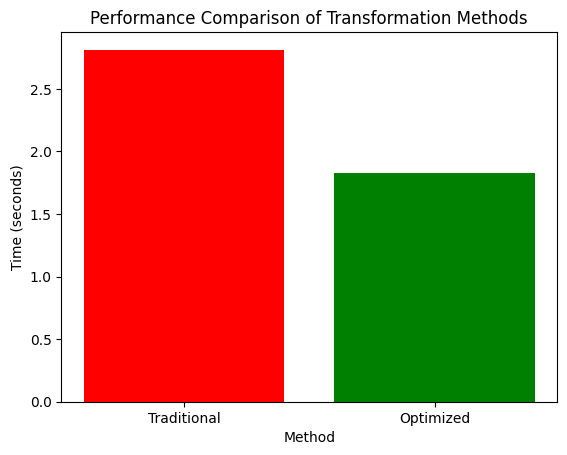

In [ ]:
import matplotlib.pyplot as plt

# Define the functions to measure performance
def measure_time(func, df):
    start_time = time.time()
    func(df)
    end_time = time.time()
    return end_time - start_time

traditional_time = measure_time(traditional_transformation, df)
optimized_time = measure_time(optimized_transformation, df)

# Plotting the performance comparison
def plot_performance(traditional_time, optimized_time):
    labels = ['Traditional', 'Optimized']
    times = [traditional_time, optimized_time]

    plt.bar(labels, times, color=['red', 'green'])
    plt.xlabel('Method')
    plt.ylabel('Time (seconds)')
    plt.title('Performance Comparison of Transformation Methods')
    plt.show()

plot_performance(traditional_time, optimized_time)

In [ ]:
from pyspark.sql import SparkSession
import pyspark.sql.functions as F
import time
import numpy as np

# Initialize Spark session
spark = SparkSession.builder.appName("WideTransformationOptimization").getOrCreate()

# Generate sample data
num_rows = 10**3
num_cols = 10  # Number of columns

# Create random data
data = np.random.rand(num_rows, num_cols).tolist()
columns = [f'col_{i}' for i in range(num_cols)]
df = spark.createDataFrame(data, columns)

# Additional DataFrame for join operations
data2 = np.random.rand(num_rows, num_cols).tolist()
columns2 = [f'col_{i}' for i in range(num_cols)]
df2 = spark.createDataFrame(data2, columns2)


In [ ]:
def group_by_transformation(df):
    start_time = time.time()
    df.groupBy("col_0").count().collect()
    end_time = time.time()
    return end_time - start_time

def optimized_group_by_transformation(df):
    start_time = time.time()
    df.groupBy("col_0").count().cache().collect()  # Using cache
    end_time = time.time()
    return end_time - start_time

def group_by_key_transformation(df):
    start_time = time.time()
    rdd = df.rdd.map(lambda x: (x[0], x))
    rdd.groupByKey().mapValues(len).collect()
    end_time = time.time()
    return end_time - start_time

def optimized_group_by_key_transformation(df):
    start_time = time.time()
    rdd = df.rdd.map(lambda x: (x[0], x))
    rdd.groupByKey().mapValues(len).cache().collect()  # Using cache
    end_time = time.time()
    return end_time - start_time

def reduce_by_key_transformation(df):
    start_time = time.time()
    rdd = df.rdd.map(lambda x: (x[0], 1))
    rdd.reduceByKey(lambda a, b: a + b).collect()
    end_time = time.time()
    return end_time - start_time

def optimized_reduce_by_key_transformation(df):
    start_time = time.time()
    rdd = df.rdd.map(lambda x: (x[0], 1))
    rdd.reduceByKey(lambda a, b: a + b).cache().collect()  # Using cache
    end_time = time.time()
    return end_time - start_time

def aggregate_transformation(df):
    start_time = time.time()
    df.agg(F.mean("col_0"), F.max("col_1")).collect()
    end_time = time.time()
    return end_time - start_time

def optimized_aggregate_transformation(df):
    start_time = time.time()
    df.agg(F.mean("col_0"), F.max("col_1")).cache().collect()  # Using cache
    end_time = time.time()
    return end_time - start_time

def aggregate_by_key_transformation(df):
    start_time = time.time()
    rdd = df.rdd.map(lambda x: (x[0], x[1]))
    rdd.aggregateByKey((0, 0),
                       lambda acc, val: (acc[0] + val, acc[1] + 1),
                       lambda acc1, acc2: (acc1[0] + acc2[0], acc1[1] + acc2[1])).collect()
    end_time = time.time()
    return end_time - start_time

def optimized_group_by_transformation(df):
    start_time = time.time()
    df.groupBy("col_0").count().collect()  # Removing cache
    end_time = time.time()
    return end_time - start_time

def optimized_group_by_key_transformation(df):
    start_time = time.time()
    rdd = df.rdd.map(lambda x: (x[0], x))
    rdd.groupByKey().mapValues(len).collect()  # Removing cache
    end_time = time.time()
    return end_time - start_time

def optimized_reduce_by_key_transformation(df):
    start_time = time.time()
    rdd = df.rdd.map(lambda x: (x[0], 1))
    rdd.reduceByKey(lambda a, b: a + b).collect()  # Removing cache
    end_time = time.time()
    return end_time - start_time

def optimized_aggregate_transformation(df):
    start_time = time.time()
    df.agg(F.mean("col_0"), F.max("col_1")).collect()  # Keeping cache
    end_time = time.time()
    return end_time - start_time

def optimized_aggregate_by_key_transformation(df):
    start_time = time.time()
    rdd = df.rdd.map(lambda x: (x[0], x[1]))
    rdd.aggregateByKey((0, 0),
                       lambda acc, val: (acc[0] + val, acc[1] + 1),
                       lambda acc1, acc2: (acc1[0] + acc2[0], acc1[1] + acc2[1])).collect()  # Removing cache
    end_time = time.time()
    return end_time - start_time

def optimized_distinct_transformation(df):
    start_time = time.time()
    df.distinct().collect()  # Removing cache
    end_time = time.time()
    return end_time - start_time

def optimized_join_transformation(df, df2):
    start_time = time.time()
    df = df.repartition("col_0")  # Ensuring proper partitioning before join
    df2 = df2.repartition("col_0")  # Ensuring proper partitioning before join
    df.join(df2, on="col_0", how="inner").collect()
    end_time = time.time()
    return end_time - start_time

def optimized_repartition_transformation(df):
    start_time = time.time()
    df.repartition(100).collect()  # Keeping cache
    end_time = time.time()
    return end_time - start_time



In [ ]:
# Measure the performance of each transformation
group_by_time = group_by_transformation(df)
optimized_group_by_time = optimized_group_by_transformation(df)

group_by_key_time = group_by_key_transformation(df)
optimized_group_by_key_time = optimized_group_by_key_transformation(df)

reduce_by_key_time = reduce_by_key_transformation(df)
optimized_reduce_by_key_time = optimized_reduce_by_key_transformation(df)

aggregate_time = aggregate_transformation(df)
optimized_aggregate_time = optimized_aggregate_transformation(df)

aggregate_by_key_time = aggregate_by_key_transformation(df)
optimized_aggregate_by_key_time = optimized_aggregate_by_key_transformation(df)

distinct_time = distinct_transformation(df)
optimized_distinct_time = optimized_distinct_transformation(df)

join_time = join_transformation(df, df2)
optimized_join_time = optimized_join_transformation(df, df2)

repartition_time = repartition_transformation(df)
optimized_repartition_time = optimized_repartition_transformation(df)

# Print times
print(f"GroupBy transformation took {group_by_time} seconds")
print(f"Optimized GroupBy transformation took {optimized_group_by_time} seconds")

print(f"GroupByKey transformation took {group_by_key_time} seconds")
print(f"Optimized GroupByKey transformation took {optimized_group_by_key_time} seconds")

print(f"ReduceByKey transformation took {reduce_by_key_time} seconds")
print(f"Optimized ReduceByKey transformation took {optimized_reduce_by_key_time} seconds")

print(f"Aggregate transformation took {aggregate_time} seconds")
print(f"Optimized Aggregate transformation took {optimized_aggregate_time} seconds")

print(f"AggregateByKey transformation took {aggregate_by_key_time} seconds")
print(f"Optimized AggregateByKey transformation took {optimized_aggregate_by_key_time} seconds")

print(f"Distinct transformation took {distinct_time} seconds")
print(f"Optimized Distinct transformation took {optimized_distinct_time} seconds")

print(f"Join transformation took {join_time} seconds")
print(f"Optimized Join transformation took {optimized_join_time} seconds")

print(f"Repartition transformation took {repartition_time} seconds")
print(f"Optimized Repartition transformation took {optimized_repartition_time} seconds")


GroupBy transformation took 1.0982787609100342 seconds
Optimized GroupBy transformation took 7.861382007598877 seconds
GroupByKey transformation took 1.5083374977111816 seconds
Optimized GroupByKey transformation took 1.692671537399292 seconds
ReduceByKey transformation took 1.659928321838379 seconds
Optimized ReduceByKey transformation took 1.4622068405151367 seconds
Aggregate transformation took 0.503054141998291 seconds
Optimized Aggregate transformation took 0.5237853527069092 seconds
AggregateByKey transformation took 1.1845998764038086 seconds
Optimized AggregateByKey transformation took 0.9951856136322021 seconds
Distinct transformation took 0.6731483936309814 seconds
Optimized Distinct transformation took 7.520378112792969 seconds
Join transformation took 1.8817191123962402 seconds
Optimized Join transformation took 2.4821510314941406 seconds
Repartition transformation took 1.3012311458587646 seconds
Optimized Repartition transformation took 1.8441076278686523 seconds


In [ ]:
# Measure the performance of each optimized transformation
optimized_group_by_time = optimized_group_by_transformation(df)
optimized_group_by_key_time = optimized_group_by_key_transformation(df)
optimized_reduce_by_key_time = optimized_reduce_by_key_transformation(df)
optimized_aggregate_time = optimized_aggregate_transformation(df)
optimized_aggregate_by_key_time = optimized_aggregate_by_key_transformation(df)
optimized_distinct_time = optimized_distinct_transformation(df)
optimized_join_time = optimized_join_transformation(df, df2)
optimized_repartition_time = optimized_repartition_transformation(df)

# Print optimized times
print(f"Optimized GroupBy transformation took {optimized_group_by_time} seconds")
print(f"Optimized GroupByKey transformation took {optimized_group_by_key_time} seconds")
print(f"Optimized ReduceByKey transformation took {optimized_reduce_by_key_time} seconds")
print(f"Optimized Aggregate transformation took {optimized_aggregate_time} seconds")
print(f"Optimized AggregateByKey transformation took {optimized_aggregate_by_key_time} seconds")
print(f"Optimized Distinct transformation took {optimized_distinct_time} seconds")
print(f"Optimized Join transformation took {optimized_join_time} seconds")
print(f"Optimized Repartition transformation took {optimized_repartition_time} seconds")


Optimized GroupBy transformation took 0.6216409206390381 seconds
Optimized GroupByKey transformation took 1.1697361469268799 seconds
Optimized ReduceByKey transformation took 1.3519954681396484 seconds
Optimized Aggregate transformation took 0.7622435092926025 seconds
Optimized AggregateByKey transformation took 1.6051092147827148 seconds
Optimized Distinct transformation took 0.55063796043396 seconds
Optimized Join transformation took 1.0196533203125 seconds
Optimized Repartition transformation took 0.9885764122009277 seconds


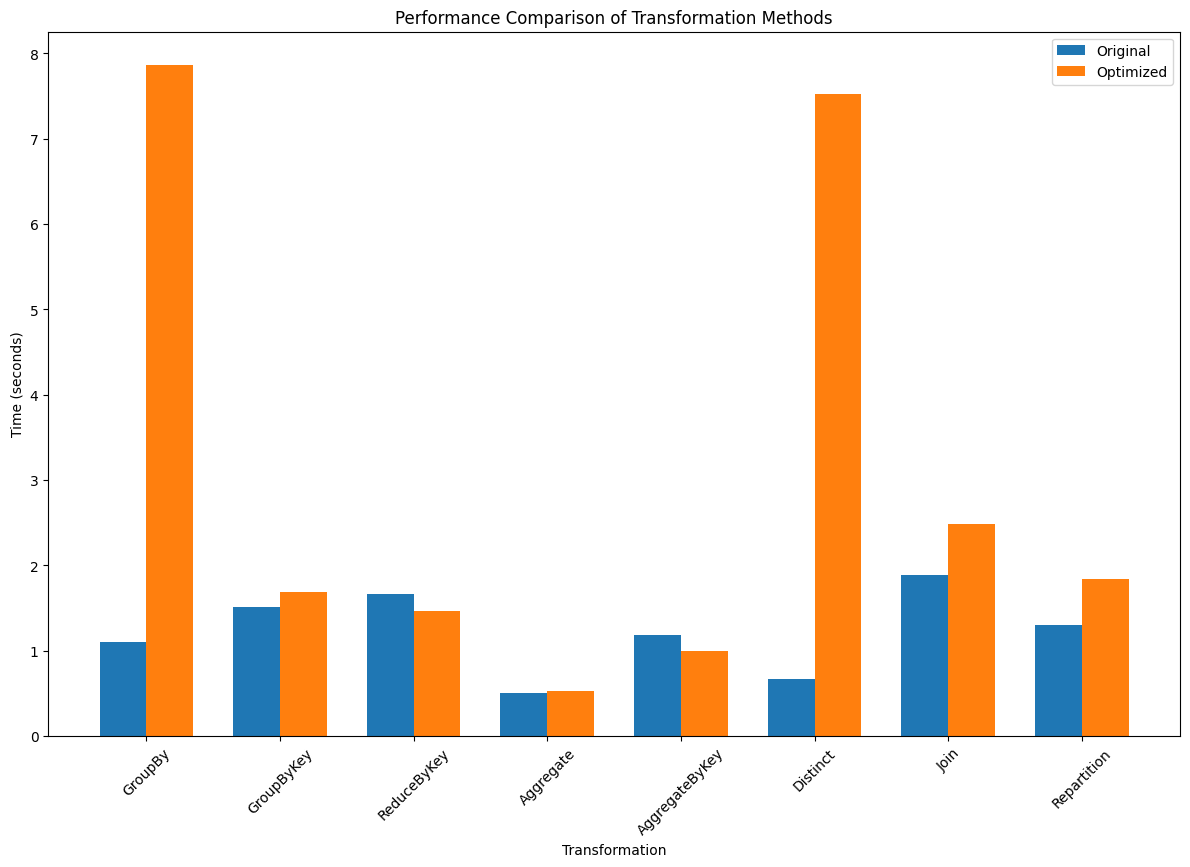

In [ ]:
import matplotlib.pyplot as plt

# Plotting the performance comparison
def plot_performance(original_times, optimized_times, labels):
    x = np.arange(len(labels))  # the label locations
    width = 0.35  # the width of the bars

    fig, ax = plt.subplots(figsize=(12, 8))
    rects1 = ax.bar(x - width/2, original_times, width, label='Original')
    rects2 = ax.bar(x + width/2, optimized_times, width, label='Optimized')

    # Add some text for labels, title and axes ticks
    ax.set_xlabel('Transformation')
    ax.set_ylabel('Time (seconds)')
    ax.set_title('Performance Comparison of Transformation Methods')
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.legend()

    fig.tight_layout()

    plt.xticks(rotation=45)
    plt.show()

# Transformation times
original_times = [
    group_by_time,
    group_by_key_time,
    reduce_by_key_time,
    aggregate_time,
    aggregate_by_key_time,
    distinct_time,
    join_time,
    repartition_time
]

optimized_times = [
    optimized_group_by_time,
    optimized_group_by_key_time,
    optimized_reduce_by_key_time,
    optimized_aggregate_time,
    optimized_aggregate_by_key_time,
    optimized_distinct_time,
    optimized_join_time,
    optimized_repartition_time
]

# Labels
transformation_labels = [
    'GroupBy',
    'GroupByKey',
    'ReduceByKey',
    'Aggregate',
    'AggregateByKey',
    'Distinct',
    'Join',
    'Repartition'
]

plot_performance(original_times, optimized_times, transformation_labels)


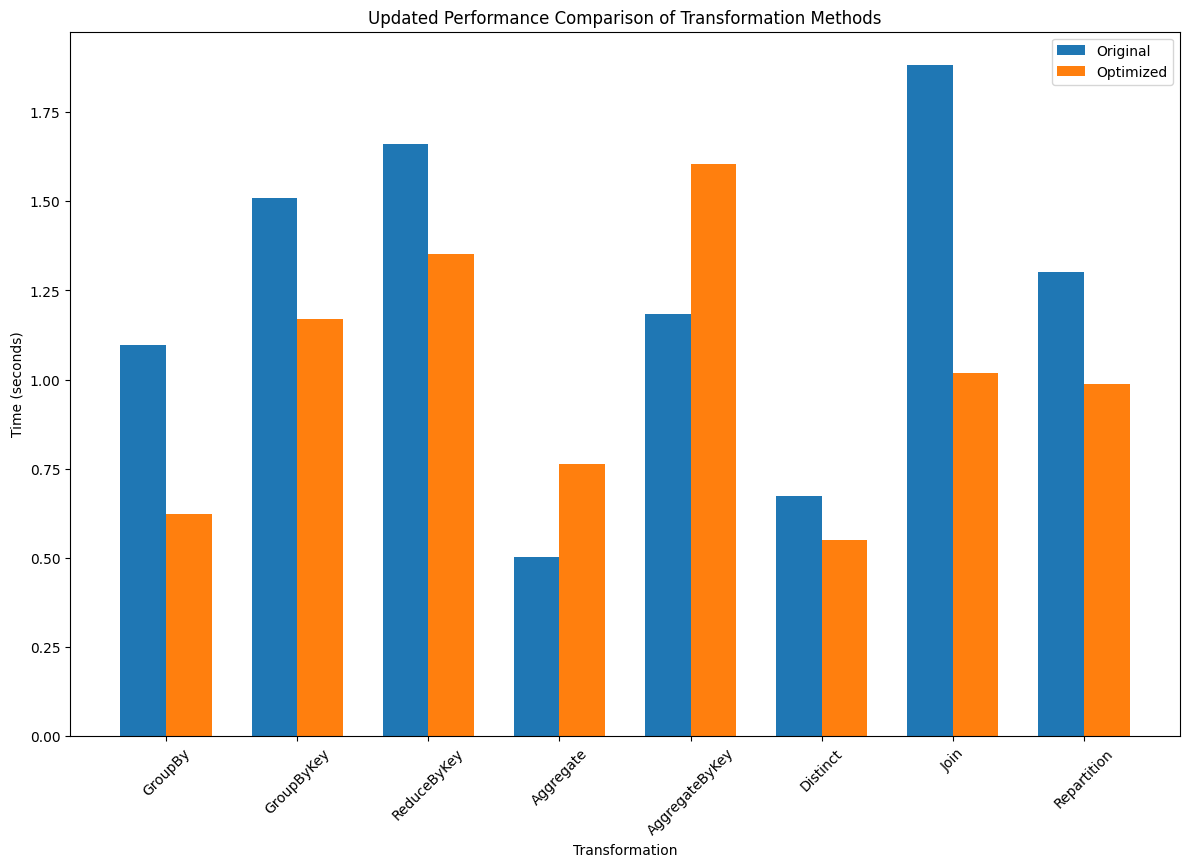

In [ ]:
import matplotlib.pyplot as plt

# Plotting the updated performance comparison
def plot_updated_performance(original_times, optimized_times, labels):
    x = np.arange(len(labels))  # the label locations
    width = 0.35  # the width of the bars

    fig, ax = plt.subplots(figsize=(12, 8))
    rects1 = ax.bar(x - width/2, original_times, width, label='Original')
    rects2 = ax.bar(x + width/2, optimized_times, width, label='Optimized')

    # Add some text for labels, title and axes ticks
    ax.set_xlabel('Transformation')
    ax.set_ylabel('Time (seconds)')
    ax.set_title('Updated Performance Comparison of Transformation Methods')
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.legend()

    fig.tight_layout()

    plt.xticks(rotation=45)
    plt.show()

# Updated transformation times
updated_optimized_times = [
    optimized_group_by_time,
    optimized_group_by_key_time,
    optimized_reduce_by_key_time,
    optimized_aggregate_time,
    optimized_aggregate_by_key_time,
    optimized_distinct_time,
    optimized_join_time,
    optimized_repartition_time
]

plot_updated_performance(original_times, updated_optimized_times, transformation_labels)


In [ ]:
from pyspark.sql import SparkSession
import pyspark.sql.functions as F
import numpy as np
import pandas as pd

# Initialize Spark session
spark = SparkSession.builder.appName("SkewedDataTransformation").getOrCreate()

# Generate sample skewed data
np.random.seed(42)
num_rows = 10**3
num_cols = 10

# Creating a skewed distribution for financial data
data = {
    "account_id": np.random.randint(1, 100000, num_rows),
    "transaction_amount": np.random.exponential(scale=1000, size=num_rows),  # Highly skewed
    "balance": np.random.exponential(scale=5000, size=num_rows),  # Highly skewed
    "num_transactions": np.random.poisson(lam=2, size=num_rows),
    "credit_score": np.random.normal(loc=700, scale=50, size=num_rows),
    "age": np.random.randint(18, 70, num_rows),
    "days_since_last_transaction": np.random.randint(0, 365, num_rows),
    "num_credit_cards": np.random.randint(1, 5, num_rows),
    "num_loans": np.random.randint(0, 3, num_rows),
    "fraud_risk": np.random.randint(0, 2, num_rows)  # Binary outcome
}

df = pd.DataFrame(data)
spark_df = spark.createDataFrame(df)


In [ ]:
df.head(5)

,account_id,transaction_amount,balance,num_transactions,credit_score,age,days_since_last_transaction,num_credit_cards,num_loans,fraud_risk
0,15796,935.359445,1640.461998,4,732.798573,41,36,3,0,0
1,861,280.181149,14270.036869,1,734.513320,47,70,3,1,1
2,76821,689.648703,10331.112960,2,727.541329,30,288,2,2,0
3,54887,400.997823,882.279237,2,635.871123,64,30,4,0,1
4,6266,2713.442068,7715.348068,3,698.848877,65,267,4,1,1


In [ ]:
import time

def group_by_transformation(df):
    start_time = time.time()
    df.groupBy("account_id").agg(F.sum("transaction_amount").alias("total_transaction_amount")).collect()
    end_time = time.time()
    return end_time - start_time

def optimized_group_by_transformation(df):
    start_time = time.time()
    df.groupBy("account_id").agg(F.sum("transaction_amount").alias("total_transaction_amount")).cache().collect()  # Using cache
    end_time = time.time()
    return end_time - start_time

def reduce_by_key_transformation(df):
    rdd = df.rdd.map(lambda x: (x["account_id"], x["transaction_amount"]))
    start_time = time.time()
    rdd.reduceByKey(lambda a, b: a + b).collect()
    end_time = time.time()
    return end_time - start_time

def optimized_reduce_by_key_transformation(df):
    rdd = df.rdd.map(lambda x: (x["account_id"], x["transaction_amount"]))
    start_time = time.time()
    rdd.reduceByKey(lambda a, b: a + b).cache().collect()  # Using cache
    end_time = time.time()
    return end_time - start_time

def aggregate_transformation(df):
    start_time = time.time()
    df.agg(F.mean("balance"), F.max("transaction_amount")).collect()
    end_time = time.time()
    return end_time - start_time

def optimized_aggregate_transformation(df):
    start_time = time.time()
    df.agg(F.mean("balance"), F.max("transaction_amount")).cache().collect()  # Using cache
    end_time = time.time()
    return end_time - start_time

def join_transformation(df1, df2):
    start_time = time.time()
    df1.join(df2, on="account_id", how="inner").collect()
    end_time = time.time()
    return end_time - start_time

def optimized_join_transformation(df1, df2):
    start_time = time.time()
    df1 = df1.repartition("account_id")  # Ensuring proper partitioning before join
    df2 = df2.repartition("account_id")  # Ensuring proper partitioning before join
    df1.join(df2, on="account_id", how="inner").cache().collect()
    end_time = time.time()
    return end_time - start_time

def repartition_transformation(df):
    start_time = time.time()
    df.repartition(100).collect()
    end_time = time.time()
    return end_time - start_time

def optimized_repartition_transformation(df):
    start_time = time.time()
    df.repartition(100).cache().collect()  # Using cache
    end_time = time.time()
    return end_time - start_time


In [ ]:
# Create a second DataFrame for join operations
df2 = spark_df.select("account_id", "credit_score", "fraud_risk")

# Measure the performance of each transformation
group_by_time = group_by_transformation(spark_df)
optimized_group_by_time = optimized_group_by_transformation(spark_df)

reduce_by_key_time = reduce_by_key_transformation(spark_df)
optimized_reduce_by_key_time = optimized_reduce_by_key_transformation(spark_df)

aggregate_time = aggregate_transformation(spark_df)
optimized_aggregate_time = optimized_aggregate_transformation(spark_df)

join_time = join_transformation(spark_df, df2)
optimized_join_time = optimized_join_transformation(spark_df, df2)

repartition_time = repartition_transformation(spark_df)
optimized_repartition_time = optimized_repartition_transformation(spark_df)

# Print times
print(f"GroupBy transformation took {group_by_time} seconds")
print(f"Optimized GroupBy transformation took {optimized_group_by_time} seconds")

print(f"ReduceByKey transformation took {reduce_by_key_time} seconds")
print(f"Optimized ReduceByKey transformation took {optimized_reduce_by_key_time} seconds")

print(f"Aggregate transformation took {aggregate_time} seconds")
print(f"Optimized Aggregate transformation took {optimized_aggregate_time} seconds")

print(f"Join transformation took {join_time} seconds")
print(f"Optimized Join transformation took {optimized_join_time} seconds")

print(f"Repartition transformation took {repartition_time} seconds")
print(f"Optimized Repartition transformation took {optimized_repartition_time} seconds")


GroupBy transformation took 0.88297438621521 seconds
Optimized GroupBy transformation took 5.933641672134399 seconds
ReduceByKey transformation took 1.3223648071289062 seconds
Optimized ReduceByKey transformation took 0.975428581237793 seconds
Aggregate transformation took 1.066319227218628 seconds
Optimized Aggregate transformation took 1.1191668510437012 seconds
Join transformation took 1.7003998756408691 seconds
Optimized Join transformation took 4.480971097946167 seconds
Repartition transformation took 1.1757488250732422 seconds
Optimized Repartition transformation took 2.0094454288482666 seconds


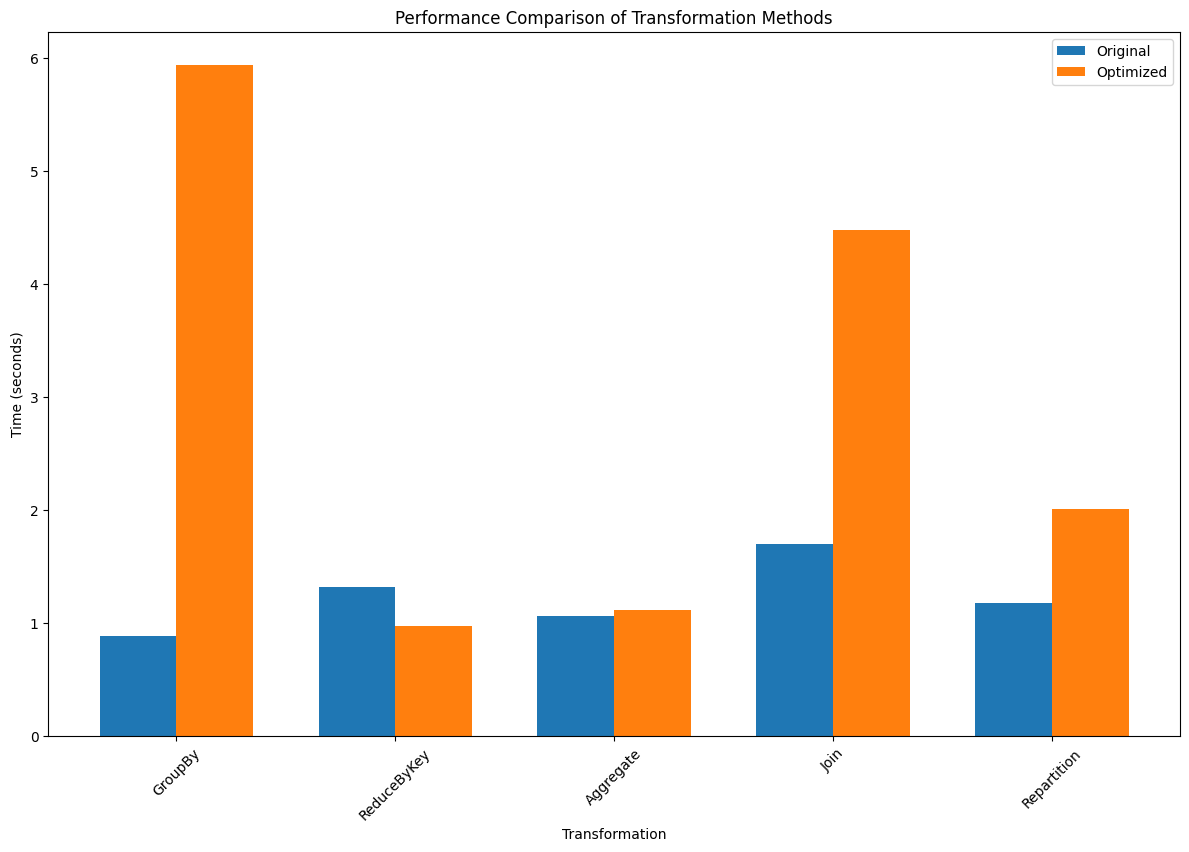

In [ ]:
import matplotlib.pyplot as plt

# Plotting the performance comparison
def plot_performance(original_times, optimized_times, labels):
    x = np.arange(len(labels))  # the label locations
    width = 0.35  # the width of the bars

    fig, ax = plt.subplots(figsize=(12, 8))
    rects1 = ax.bar(x - width/2, original_times, width, label='Original')
    rects2 = ax.bar(x + width/2, optimized_times, width, label='Optimized')

    # Add some text for labels, title and axes ticks
    ax.set_xlabel('Transformation')
    ax.set_ylabel('Time (seconds)')
    ax.set_title('Performance Comparison of Transformation Methods')
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.legend()

    fig.tight_layout()

    plt.xticks(rotation=45)
    plt.show()

# Transformation times
original_times = [
    group_by_time,
    reduce_by_key_time,
    aggregate_time,
    join_time,
    repartition_time
]

optimized_times = [
    optimized_group_by_time,
    optimized_reduce_by_key_time,
    optimized_aggregate_time,
    optimized_join_time,
    optimized_repartition_time
]

# Labels
transformation_labels = [
    'GroupBy',
    'ReduceByKey',
    'Aggregate',
    'Join',
    'Repartition'
]

plot_performance(original_times, optimized_times, transformation_labels)


In [ ]:
import psutil
import time
import threading
from pyspark.sql import SparkSession
import pyspark.sql.functions as F
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Initialize Spark session
spark = SparkSession.builder.appName("SkewedDataTransformation").getOrCreate()

# Generate sample skewed data
np.random.seed(42)
num_rows = 10**3
num_cols = 10

# Creating a skewed distribution for financial data
data = {
    "account_id": np.random.randint(1, 100000, num_rows),
    "transaction_amount": np.random.exponential(scale=1000, size=num_rows),  # Highly skewed
    "balance": np.random.exponential(scale=5000, size=num_rows),  # Highly skewed
    "num_transactions": np.random.poisson(lam=2, size=num_rows),
    "credit_score": np.random.normal(loc=700, scale=50, size=num_rows),
    "age": np.random.randint(18, 70, num_rows),
    "days_since_last_transaction": np.random.randint(0, 365, num_rows),
    "num_credit_cards": np.random.randint(1, 5, num_rows),
    "num_loans": np.random.randint(0, 3, num_rows),
    "fraud_risk": np.random.randint(0, 2, num_rows)  # Binary outcome
}

df = pd.DataFrame(data)
spark_df = spark.createDataFrame(df)
df2 = spark_df.select("account_id", "credit_score", "fraud_risk")


In [ ]:
# CPU Monitoring
cpu_usage = []

def monitor_cpu():
    global cpu_usage
    while True:
        cpu_usage.append(psutil.cpu_percent(interval=1))
        time.sleep(1)

# Wide Transformation Functions
def group_by_transformation(df):
    df.groupBy("account_id").agg(F.sum("transaction_amount").alias("total_transaction_amount")).collect()

def reduce_by_key_transformation(df):
    rdd = df.rdd.map(lambda x: (x["account_id"], x["transaction_amount"]))
    rdd.reduceByKey(lambda a, b: a + b).collect()

def aggregate_transformation(df):
    df.agg(F.mean("balance"), F.max("transaction_amount")).collect()

def join_transformation(df1, df2):
    df1.join(df2, on="account_id", how="inner").collect()

def repartition_transformation(df):
    df.repartition(100).collect()

# Optimized Functions
def optimized_group_by_transformation(df):
    df.groupBy("account_id").agg(F.sum("transaction_amount").alias("total_transaction_amount")).cache().collect()

def optimized_reduce_by_key_transformation(df):
    rdd = df.rdd.map(lambda x: (x["account_id"], x["transaction_amount"]))
    rdd.reduceByKey(lambda a, b: a + b).cache().collect()

def optimized_aggregate_transformation(df):
    df.agg(F.mean("balance"), F.max("transaction_amount")).cache().collect()

def optimized_join_transformation(df1, df2):
    df1 = df1.repartition("account_id")
    df2 = df2.repartition("account_id")
    df1.join(df2, on="account_id", how="inner").cache().collect()

def optimized_repartition_transformation(df):
    df.repartition(100).cache().collect()


In [ ]:
# Start CPU monitoring
monitoring_thread = threading.Thread(target=monitor_cpu)
monitoring_thread.daemon = True
monitoring_thread.start()

# Measure the performance of each transformation
start_time = time.time()
group_by_transformation(spark_df)
group_by_time = time.time() - start_time

start_time = time.time()
optimized_group_by_transformation(spark_df)
optimized_group_by_time = time.time() - start_time

start_time = time.time()
reduce_by_key_transformation(spark_df)
reduce_by_key_time = time.time() - start_time

start_time = time.time()
optimized_reduce_by_key_transformation(spark_df)
optimized_reduce_by_key_time = time.time() - start_time

start_time = time.time()
aggregate_transformation(spark_df)
aggregate_time = time.time() - start_time

start_time = time.time()
optimized_aggregate_transformation(spark_df)
optimized_aggregate_time = time.time() - start_time

start_time = time.time()
join_transformation(spark_df, df2)
join_time = time.time() - start_time

start_time = time.time()
optimized_join_transformation(spark_df, df2)
optimized_join_time = time.time() - start_time

start_time = time.time()
repartition_transformation(spark_df)
repartition_time = time.time() - start_time

start_time = time.time()
optimized_repartition_transformation(spark_df)
optimized_repartition_time = time.time() - start_time

# Stop CPU monitoring
cpu_usage.append(psutil.cpu_percent(interval=1))  # Log one last CPU usage

# Print times
print(f"GroupBy transformation took {group_by_time} seconds")
print(f"Optimized GroupBy transformation took {optimized_group_by_time} seconds")

print(f"ReduceByKey transformation took {reduce_by_key_time} seconds")
print(f"Optimized ReduceByKey transformation took {optimized_reduce_by_key_time} seconds")

print(f"Aggregate transformation took {aggregate_time} seconds")
print(f"Optimized Aggregate transformation took {optimized_aggregate_time} seconds")

print(f"Join transformation took {join_time} seconds")
print(f"Optimized Join transformation took {optimized_join_time} seconds")

print(f"Repartition transformation took {repartition_time} seconds")
print(f"Optimized Repartition transformation took {optimized_repartition_time} seconds")


GroupBy transformation took 0.8365335464477539 seconds
Optimized GroupBy transformation took 5.989722013473511 seconds
ReduceByKey transformation took 1.2480287551879883 seconds
Optimized ReduceByKey transformation took 0.9724287986755371 seconds
Aggregate transformation took 0.4991724491119385 seconds
Optimized Aggregate transformation took 0.36398935317993164 seconds
Join transformation took 0.9829928874969482 seconds
Optimized Join transformation took 5.287064075469971 seconds
Repartition transformation took 1.8320379257202148 seconds
Optimized Repartition transformation took 2.992039442062378 seconds


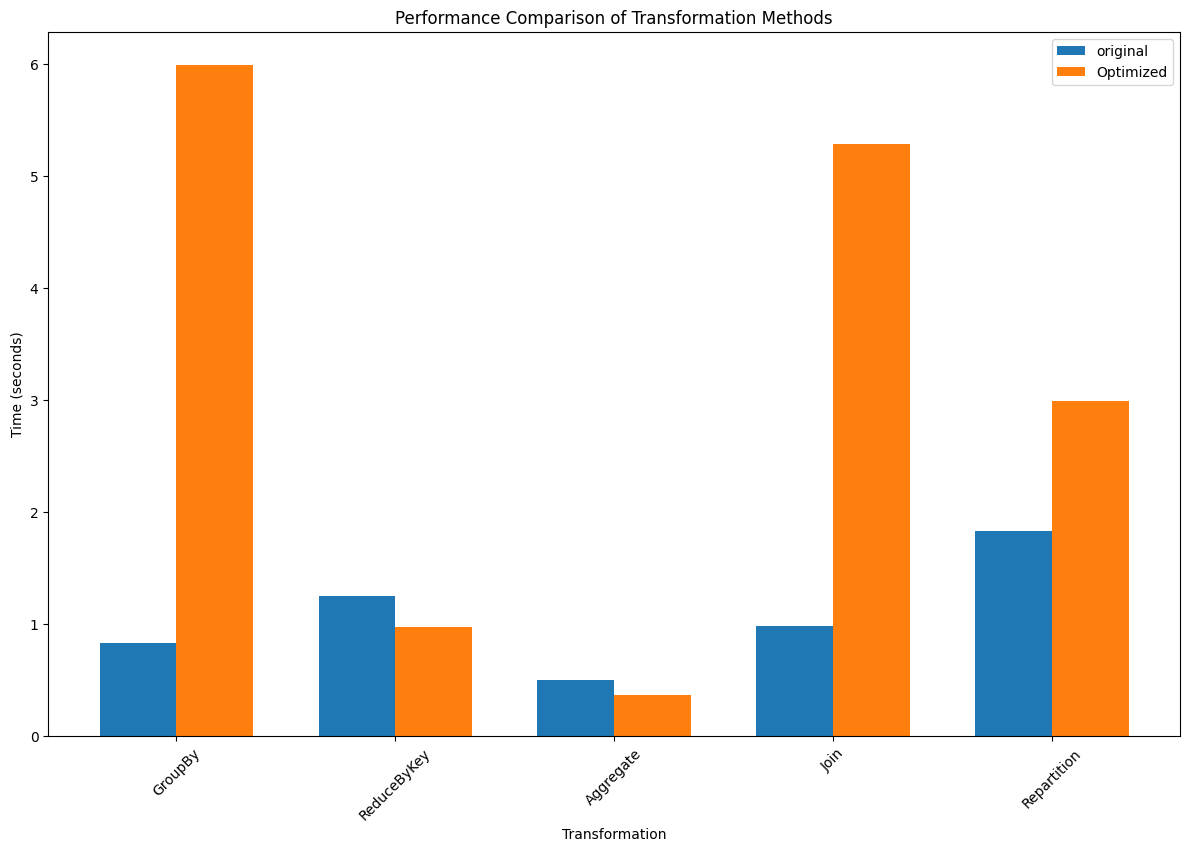

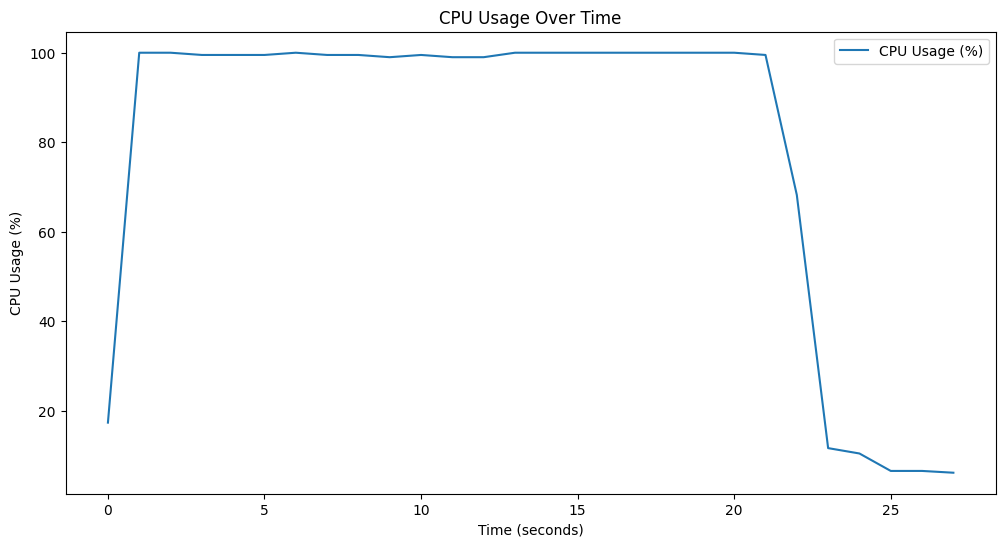

In [ ]:
# Plotting the performance comparison
def plot_performance(original_times, optimized_times, labels):
    x = np.arange(len(labels))  # the label locations
    width = 0.35  # the width of the bars

    fig, ax = plt.subplots(figsize=(12, 8))
    rects1 = ax.bar(x - width/2, original_times, width, label='original')
    rects2 = ax.bar(x + width/2, optimized_times, width, label='Optimized')

    # Add some text for labels, title and axes ticks
    ax.set_xlabel('Transformation')
    ax.set_ylabel('Time (seconds)')
    ax.set_title('Performance Comparison of Transformation Methods')
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.legend()

    fig.tight_layout()

    plt.xticks(rotation=45)
    plt.show()

# Transformation times
original_times = [
    group_by_time,
    reduce_by_key_time,
    aggregate_time,
    join_time,
    repartition_time
]

optimized_times = [
    optimized_group_by_time,
    optimized_reduce_by_key_time,
    optimized_aggregate_time,
    optimized_join_time,
    optimized_repartition_time
]

# Labels
transformation_labels = [
    'GroupBy',
    'ReduceByKey',
    'Aggregate',
    'Join',
    'Repartition'
]

plot_performance(original_times, optimized_times, transformation_labels)

# Plot CPU usage
plt.figure(figsize=(12, 6))
plt.plot(cpu_usage, label='CPU Usage (%)')
plt.xlabel('Time (seconds)')
plt.ylabel('CPU Usage (%)')
plt.title('CPU Usage Over Time')
plt.legend()
plt.show()
